In [1]:
# 경고 메세지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold
from sklearn.model_selection import KFold           # 랜덤하게 섞어서 자를 수도 있고, 순서대로 자를 수도 있음
from sklearn.model_selection import StratifiedKFold # 결과 데이터의 비율이 최대한 균등하게 들어갈 수 있도록!

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family']='Malgun Gothic'
# 맥용 plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# seed 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 읽어오기
df1 = pd.read_csv('../../data/wine.csv', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# 데이터 분류

x = df1.drop(12, axis=1)
y = df1[12]

display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [5]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 학습
# validation_split을 두면 검증용 데이터셋을 0.33

history = model.fit(x, y, validation_split=0.33, epochs=3500, batch_size=500)

Epoch 1/3500
9/9 [==============================] - 1s 42ms/step - loss: 2.1027 - accuracy: 0.6296 - val_loss: 1.1027 - val_accuracy: 0.3100
Epoch 2/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.8799 - accuracy: 0.4461 - val_loss: 0.0633 - val_accuracy: 0.9972
Epoch 3/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.6297 - accuracy: 0.6542 - val_loss: 0.4234 - val_accuracy: 0.8312
Epoch 4/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.4765 - accuracy: 0.7965 - val_loss: 0.2341 - val_accuracy: 0.9366
Epoch 5/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.4041 - accuracy: 0.8500 - val_loss: 0.2909 - val_accuracy: 0.8867
Epoch 6/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.3565 - accuracy: 0.8851 - val_loss: 0.3348 - val_accuracy: 0.8513
Epoch 7/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.3263 - accuracy: 0.9025 - val_loss: 0.2624 - val_accuracy: 0.9007
Epoch 8/3500
9/9 [

9/9 [==============================] - 0s 7ms/step - loss: 0.1842 - accuracy: 0.9254 - val_loss: 0.1558 - val_accuracy: 0.9641
Epoch 60/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1809 - accuracy: 0.9320 - val_loss: 0.1801 - val_accuracy: 0.9576
Epoch 61/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1910 - accuracy: 0.9287 - val_loss: 0.1558 - val_accuracy: 0.9646
Epoch 62/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1769 - accuracy: 0.9329 - val_loss: 0.1570 - val_accuracy: 0.9618
Epoch 63/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1867 - accuracy: 0.9264 - val_loss: 0.1294 - val_accuracy: 0.9683
Epoch 64/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1780 - accuracy: 0.9324 - val_loss: 0.2117 - val_accuracy: 0.9492
Epoch 65/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9255 - val_loss: 0.1216 - val_accuracy: 0.9688
Epoch 66/3500
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.1132 - accuracy: 0.9643 - val_loss: 0.1101 - val_accuracy: 0.9697
Epoch 118/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1162 - accuracy: 0.9639 - val_loss: 0.0965 - val_accuracy: 0.9748
Epoch 119/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1143 - accuracy: 0.9612 - val_loss: 0.0907 - val_accuracy: 0.9753
Epoch 120/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1154 - accuracy: 0.9634 - val_loss: 0.1027 - val_accuracy: 0.9711
Epoch 121/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1066 - accuracy: 0.9664 - val_loss: 0.0883 - val_accuracy: 0.9758
Epoch 122/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1079 - accuracy: 0.9674 - val_loss: 0.0703 - val_accuracy: 0.9814
Epoch 123/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1066 - accuracy: 0.9666 - val_loss: 0.0630 - val_accuracy: 0.9818
Epoch 124/3500
9/9 [=

Epoch 175/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0910 - accuracy: 0.9718 - val_loss: 0.0490 - val_accuracy: 0.9832
Epoch 176/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0819 - accuracy: 0.9757 - val_loss: 0.0485 - val_accuracy: 0.9846
Epoch 177/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0742 - accuracy: 0.9749 - val_loss: 0.0512 - val_accuracy: 0.9823
Epoch 178/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0860 - accuracy: 0.9704 - val_loss: 0.0579 - val_accuracy: 0.9804
Epoch 179/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0824 - accuracy: 0.9752 - val_loss: 0.0579 - val_accuracy: 0.9804
Epoch 180/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0785 - accuracy: 0.9766 - val_loss: 0.0454 - val_accuracy: 0.9846
Epoch 181/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0935 - accuracy: 0.9698 - val_loss: 0.0479 - val_accuracy: 0.9823
Epoch 

Epoch 233/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0715 - accuracy: 0.9758 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 234/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.9755 - val_loss: 0.0386 - val_accuracy: 0.9897
Epoch 235/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0650 - accuracy: 0.9794 - val_loss: 0.0528 - val_accuracy: 0.9818
Epoch 236/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9788 - val_loss: 0.0420 - val_accuracy: 0.9855
Epoch 237/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0659 - accuracy: 0.9790 - val_loss: 0.0497 - val_accuracy: 0.9832
Epoch 238/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0665 - accuracy: 0.9826 - val_loss: 0.0456 - val_accuracy: 0.9841
Epoch 239/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0658 - accuracy: 0.9790 - val_loss: 0.0460 - val_accuracy: 0.9841
Epoch 

Epoch 291/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0645 - accuracy: 0.9826 - val_loss: 0.0422 - val_accuracy: 0.9874
Epoch 292/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9806 - val_loss: 0.0395 - val_accuracy: 0.9879
Epoch 293/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.0464 - val_accuracy: 0.9851
Epoch 294/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0758 - accuracy: 0.9775 - val_loss: 0.0929 - val_accuracy: 0.9702
Epoch 295/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0691 - accuracy: 0.9806 - val_loss: 0.0820 - val_accuracy: 0.9730
Epoch 296/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0718 - accuracy: 0.9739 - val_loss: 0.0520 - val_accuracy: 0.9837
Epoch 297/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0607 - accuracy: 0.9804 - val_loss: 0.0400 - val_accuracy: 0.9883
Epoch 

Epoch 349/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0657 - accuracy: 0.9796 - val_loss: 0.0305 - val_accuracy: 0.9921
Epoch 350/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0598 - accuracy: 0.9783 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 351/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 0.9839 - val_loss: 0.0579 - val_accuracy: 0.9823
Epoch 352/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0621 - accuracy: 0.9845 - val_loss: 0.0956 - val_accuracy: 0.9711
Epoch 353/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0674 - accuracy: 0.9801 - val_loss: 0.0855 - val_accuracy: 0.9725
Epoch 354/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0645 - accuracy: 0.9815 - val_loss: 0.0670 - val_accuracy: 0.9790
Epoch 355/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0588 - accuracy: 0.9839 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 

9/9 [==============================] - 0s 7ms/step - loss: 0.0468 - accuracy: 0.9882 - val_loss: 0.0572 - val_accuracy: 0.9851
Epoch 407/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0481 - accuracy: 0.9868 - val_loss: 0.0750 - val_accuracy: 0.9767
Epoch 408/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0639 - accuracy: 0.9799 - val_loss: 0.0584 - val_accuracy: 0.9855
Epoch 409/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0614 - accuracy: 0.9841 - val_loss: 0.1048 - val_accuracy: 0.9660
Epoch 410/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 0.9820 - val_loss: 0.0711 - val_accuracy: 0.9795
Epoch 411/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0660 - accuracy: 0.9828 - val_loss: 0.0542 - val_accuracy: 0.9851
Epoch 412/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0372 - val_accuracy: 0.9907
Epoch 413/3500
9/9 [

Epoch 464/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0539 - accuracy: 0.9841 - val_loss: 0.0738 - val_accuracy: 0.9809
Epoch 465/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0581 - accuracy: 0.9856 - val_loss: 0.0736 - val_accuracy: 0.9790
Epoch 466/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0547 - accuracy: 0.9845 - val_loss: 0.1012 - val_accuracy: 0.9683
Epoch 467/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0635 - accuracy: 0.9822 - val_loss: 0.0603 - val_accuracy: 0.9846
Epoch 468/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0608 - accuracy: 0.9809 - val_loss: 0.0498 - val_accuracy: 0.9865
Epoch 469/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9841 - val_loss: 0.0538 - val_accuracy: 0.9860
Epoch 470/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0657 - accuracy: 0.9848 - val_loss: 0.0502 - val_accuracy: 0.9865
Epoch 

Epoch 522/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0525 - accuracy: 0.9869 - val_loss: 0.0484 - val_accuracy: 0.9865
Epoch 523/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.0627 - val_accuracy: 0.9841
Epoch 524/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0555 - accuracy: 0.9861 - val_loss: 0.0607 - val_accuracy: 0.9851
Epoch 525/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.9868 - val_loss: 0.0839 - val_accuracy: 0.9739
Epoch 526/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0632 - accuracy: 0.9838 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 527/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0542 - accuracy: 0.9858 - val_loss: 0.0716 - val_accuracy: 0.9814
Epoch 528/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0519 - accuracy: 0.9864 - val_loss: 0.0740 - val_accuracy: 0.9786
Epoch 

9/9 [==============================] - 0s 7ms/step - loss: 0.0538 - accuracy: 0.9840 - val_loss: 0.0472 - val_accuracy: 0.9879
Epoch 580/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.9865 - val_loss: 0.0515 - val_accuracy: 0.9851
Epoch 581/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 0.9874 - val_loss: 0.0618 - val_accuracy: 0.9841
Epoch 582/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0506 - accuracy: 0.9884 - val_loss: 0.0613 - val_accuracy: 0.9841
Epoch 583/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0572 - accuracy: 0.9850 - val_loss: 0.0593 - val_accuracy: 0.9846
Epoch 584/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0494 - accuracy: 0.9874 - val_loss: 0.0676 - val_accuracy: 0.9828
Epoch 585/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.0572 - val_accuracy: 0.9851
Epoch 586/3500
9/9 [=

Epoch 637/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0617 - accuracy: 0.9836 - val_loss: 0.0625 - val_accuracy: 0.9841
Epoch 638/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 0.9827 - val_loss: 0.0681 - val_accuracy: 0.9828
Epoch 639/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0511 - accuracy: 0.9874 - val_loss: 0.0698 - val_accuracy: 0.9814
Epoch 640/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0490 - accuracy: 0.9886 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 641/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0613 - val_accuracy: 0.9841
Epoch 642/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9896 - val_loss: 0.0633 - val_accuracy: 0.9841
Epoch 643/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0510 - accuracy: 0.9870 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch

9/9 [==============================] - 0s 7ms/step - loss: 0.0603 - accuracy: 0.9836 - val_loss: 0.0528 - val_accuracy: 0.9851
Epoch 695/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9867 - val_loss: 0.0649 - val_accuracy: 0.9841
Epoch 696/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0520 - accuracy: 0.9867 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 697/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0531 - accuracy: 0.9865 - val_loss: 0.0689 - val_accuracy: 0.9832
Epoch 698/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0512 - accuracy: 0.9890 - val_loss: 0.0457 - val_accuracy: 0.9888
Epoch 699/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9845 - val_loss: 0.0602 - val_accuracy: 0.9841
Epoch 700/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0609 - accuracy: 0.9842 - val_loss: 0.0659 - val_accuracy: 0.9841
Epoch 701/3500
9/9 [=

Epoch 752/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 0.9865 - val_loss: 0.0676 - val_accuracy: 0.9837
Epoch 753/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0515 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9823
Epoch 754/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9851 - val_loss: 0.0981 - val_accuracy: 0.9744
Epoch 755/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0597 - accuracy: 0.9837 - val_loss: 0.0768 - val_accuracy: 0.9809
Epoch 756/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0732 - val_accuracy: 0.9823
Epoch 757/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0471 - accuracy: 0.9867 - val_loss: 0.0723 - val_accuracy: 0.9814
Epoch 758/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0477 - accuracy: 0.9888 - val_loss: 0.0702 - val_accuracy: 0.9828
Epoch

9/9 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.9898 - val_loss: 0.0682 - val_accuracy: 0.9832
Epoch 810/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0620 - accuracy: 0.9821 - val_loss: 0.0616 - val_accuracy: 0.9837
Epoch 811/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0560 - accuracy: 0.9846 - val_loss: 0.0859 - val_accuracy: 0.9776
Epoch 812/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9870 - val_loss: 0.0532 - val_accuracy: 0.9851
Epoch 813/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.9889 - val_loss: 0.0584 - val_accuracy: 0.9841
Epoch 814/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0566 - accuracy: 0.9847 - val_loss: 0.0598 - val_accuracy: 0.9841
Epoch 815/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.0614 - val_accuracy: 0.9832
Epoch 816/3500
9/9 [=

Epoch 867/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0576 - accuracy: 0.9838 - val_loss: 0.0964 - val_accuracy: 0.9758
Epoch 868/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0533 - accuracy: 0.9856 - val_loss: 0.0752 - val_accuracy: 0.9814
Epoch 869/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0519 - accuracy: 0.9865 - val_loss: 0.0765 - val_accuracy: 0.9818
Epoch 870/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0506 - accuracy: 0.9858 - val_loss: 0.0637 - val_accuracy: 0.9823
Epoch 871/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0526 - accuracy: 0.9867 - val_loss: 0.0566 - val_accuracy: 0.9846
Epoch 872/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0560 - accuracy: 0.9860 - val_loss: 0.0492 - val_accuracy: 0.9874
Epoch 873/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 0.9820 - val_loss: 0.0667 - val_accuracy: 0.9832
Epoch 

Epoch 925/3500
9/9 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.98 - 0s 7ms/step - loss: 0.0505 - accuracy: 0.9873 - val_loss: 0.0833 - val_accuracy: 0.9781
Epoch 926/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.0971 - val_accuracy: 0.9739
Epoch 927/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.9880 - val_loss: 0.0658 - val_accuracy: 0.9828
Epoch 928/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0500 - accuracy: 0.9869 - val_loss: 0.0910 - val_accuracy: 0.9786
Epoch 929/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0565 - accuracy: 0.9859 - val_loss: 0.0873 - val_accuracy: 0.9772
Epoch 930/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.1100 - val_accuracy: 0.9688
Epoch 931/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0568 - accuracy: 0.9821 - val

9/9 [==============================] - 0s 7ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0595 - val_accuracy: 0.9828
Epoch 983/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0691 - val_accuracy: 0.9809
Epoch 984/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0510 - accuracy: 0.9863 - val_loss: 0.0786 - val_accuracy: 0.9795
Epoch 985/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.0783 - val_accuracy: 0.9804
Epoch 986/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0493 - accuracy: 0.9876 - val_loss: 0.0794 - val_accuracy: 0.9795
Epoch 987/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 0.0690 - val_accuracy: 0.9814
Epoch 988/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0490 - accuracy: 0.9873 - val_loss: 0.0646 - val_accuracy: 0.9823
Epoch 989/3500
9/9 [=

9/9 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9856 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 1040/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0453 - accuracy: 0.9876 - val_loss: 0.0682 - val_accuracy: 0.9837
Epoch 1041/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0510 - accuracy: 0.9880 - val_loss: 0.0776 - val_accuracy: 0.9814
Epoch 1042/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9861 - val_loss: 0.1058 - val_accuracy: 0.9739
Epoch 1043/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.1025 - val_accuracy: 0.9739
Epoch 1044/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0542 - accuracy: 0.9873 - val_loss: 0.1053 - val_accuracy: 0.9739
Epoch 1045/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0826 - val_accuracy: 0.9800
Epoch 1046/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9834 - val_loss: 0.1220 - val_accuracy: 0.9674
Epoch 1097/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.1087 - val_accuracy: 0.9725
Epoch 1098/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0999 - val_accuracy: 0.9762
Epoch 1099/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0441 - accuracy: 0.9893 - val_loss: 0.0924 - val_accuracy: 0.9786
Epoch 1100/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.1053 - val_accuracy: 0.9744
Epoch 1101/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.0901 - val_accuracy: 0.9786
Epoch 1102/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0423 - accuracy: 0.9898 - val_loss: 0.0929 - val_accuracy: 0.9772
Epoch 1103/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9870 - val_loss: 0.1077 - val_accuracy: 0.9730
Epoch 1154/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 0.1018 - val_accuracy: 0.9753
Epoch 1155/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0557 - accuracy: 0.9860 - val_loss: 0.0632 - val_accuracy: 0.9865
Epoch 1156/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0501 - accuracy: 0.9858 - val_loss: 0.0595 - val_accuracy: 0.9869
Epoch 1157/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0444 - accuracy: 0.9877 - val_loss: 0.0729 - val_accuracy: 0.9837
Epoch 1158/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0446 - accuracy: 0.9875 - val_loss: 0.0689 - val_accuracy: 0.9846
Epoch 1159/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0461 - accuracy: 0.9868 - val_loss: 0.0642 - val_accuracy: 0.9869
Epoch 1160/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0441 - accuracy: 0.9895 - val_loss: 0.0758 - val_accuracy: 0.9828
Epoch 1211/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9879 - val_loss: 0.0678 - val_accuracy: 0.9851
Epoch 1212/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0449 - accuracy: 0.9886 - val_loss: 0.0719 - val_accuracy: 0.9828
Epoch 1213/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9884 - val_loss: 0.0808 - val_accuracy: 0.9818
Epoch 1214/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0431 - accuracy: 0.9892 - val_loss: 0.0706 - val_accuracy: 0.9846
Epoch 1215/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0464 - accuracy: 0.9868 - val_loss: 0.0529 - val_accuracy: 0.9888
Epoch 1216/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0486 - val_accuracy: 0.9897
Epoch 1217/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0445 - accuracy: 0.9873 - val_loss: 0.0761 - val_accuracy: 0.9832
Epoch 1268/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0494 - accuracy: 0.9876 - val_loss: 0.0513 - val_accuracy: 0.9893
Epoch 1269/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0581 - val_accuracy: 0.9874
Epoch 1270/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0483 - accuracy: 0.9873 - val_loss: 0.0658 - val_accuracy: 0.9855
Epoch 1271/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0468 - accuracy: 0.9881 - val_loss: 0.0566 - val_accuracy: 0.9879
Epoch 1272/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0673 - val_accuracy: 0.9851
Epoch 1273/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.9881 - val_loss: 0.0649 - val_accuracy: 0.9860
Epoch 1274/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0630 - accuracy: 0.9819 - val_loss: 0.0427 - val_accuracy: 0.9902
Epoch 1325/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0674 - accuracy: 0.9787 - val_loss: 0.0494 - val_accuracy: 0.9883
Epoch 1326/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0600 - accuracy: 0.9806 - val_loss: 0.0507 - val_accuracy: 0.9883
Epoch 1327/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.9824 - val_loss: 0.0467 - val_accuracy: 0.9902
Epoch 1328/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0566 - accuracy: 0.9834 - val_loss: 0.0583 - val_accuracy: 0.9851
Epoch 1329/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0574 - val_accuracy: 0.9855
Epoch 1330/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.9851 - val_loss: 0.0654 - val_accuracy: 0.9855
Epoch 1331/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9891 - val_loss: 0.0725 - val_accuracy: 0.9837
Epoch 1382/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0839 - val_accuracy: 0.9823
Epoch 1383/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0380 - accuracy: 0.9889 - val_loss: 0.0700 - val_accuracy: 0.9841
Epoch 1384/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.9867 - val_loss: 0.0697 - val_accuracy: 0.9851
Epoch 1385/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.0680 - val_accuracy: 0.9860
Epoch 1386/3500
9/9 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0913 - val_accuracy: 0.9795
Epoch 1387/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9888 - val_loss: 0.0878 - val_accuracy: 0.9804
Epoch 1388/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0484 - accuracy: 0.9869 - val_loss: 0.0598 - val_accuracy: 0.9865
Epoch 1439/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0431 - accuracy: 0.9885 - val_loss: 0.0550 - val_accuracy: 0.9865
Epoch 1440/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0524 - val_accuracy: 0.9879
Epoch 1441/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0589 - val_accuracy: 0.9860
Epoch 1442/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0508 - val_accuracy: 0.9883
Epoch 1443/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0444 - accuracy: 0.9840 - val_loss: 0.0549 - val_accuracy: 0.9874
Epoch 1444/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0493 - accuracy: 0.9818 - val_loss: 0.0540 - val_accuracy: 0.9869
Epoch 1445/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 0.0848 - val_accuracy: 0.9809
Epoch 1496/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0523 - accuracy: 0.9856 - val_loss: 0.0927 - val_accuracy: 0.9776
Epoch 1497/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0453 - accuracy: 0.9872 - val_loss: 0.0895 - val_accuracy: 0.9776
Epoch 1498/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9869 - val_loss: 0.0821 - val_accuracy: 0.9818
Epoch 1499/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0874 - val_accuracy: 0.9790
Epoch 1500/3500
9/9 [==============================] - 0s 15ms/step - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.0649 - val_accuracy: 0.9860
Epoch 1501/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0834 - val_accuracy: 0.9814
Epoch 1502/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9903 - val_loss: 0.0832 - val_accuracy: 0.9818
Epoch 1553/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0405 - accuracy: 0.9884 - val_loss: 0.0635 - val_accuracy: 0.9865
Epoch 1554/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0701 - val_accuracy: 0.9855
Epoch 1555/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.0670 - val_accuracy: 0.9855
Epoch 1556/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.9889 - val_loss: 0.0595 - val_accuracy: 0.9879
Epoch 1557/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9898 - val_loss: 0.0565 - val_accuracy: 0.9874
Epoch 1558/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0513 - val_accuracy: 0.9883
Epoch 1559/3500

9/9 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0859 - val_accuracy: 0.9814
Epoch 1610/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0651 - val_accuracy: 0.9855
Epoch 1611/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9877 - val_loss: 0.0720 - val_accuracy: 0.9841
Epoch 1612/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0445 - accuracy: 0.9873 - val_loss: 0.0775 - val_accuracy: 0.9828
Epoch 1613/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9883 - val_loss: 0.0741 - val_accuracy: 0.9837
Epoch 1614/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0424 - accuracy: 0.9892 - val_loss: 0.0639 - val_accuracy: 0.9860
Epoch 1615/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0793 - val_accuracy: 0.9814
Epoch 1616/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0539 - accuracy: 0.9822 - val_loss: 0.0512 - val_accuracy: 0.9874
Epoch 1667/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0688 - val_accuracy: 0.9846
Epoch 1668/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0431 - accuracy: 0.9846 - val_loss: 0.0696 - val_accuracy: 0.9832
Epoch 1669/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0840 - val_accuracy: 0.9809
Epoch 1670/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0619 - val_accuracy: 0.9860
Epoch 1671/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9891 - val_loss: 0.0731 - val_accuracy: 0.9828
Epoch 1672/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9898 - val_loss: 0.0846 - val_accuracy: 0.9809
Epoch 1673/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.9823 - val_loss: 0.0532 - val_accuracy: 0.9883
Epoch 1724/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0525 - accuracy: 0.9846 - val_loss: 0.0602 - val_accuracy: 0.9883
Epoch 1725/3500
9/9 [==============================] - 0s 15ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0611 - val_accuracy: 0.9869
Epoch 1726/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0392 - accuracy: 0.9867 - val_loss: 0.0851 - val_accuracy: 0.9823
Epoch 1727/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9912 - val_loss: 0.0897 - val_accuracy: 0.9814
Epoch 1728/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0407 - accuracy: 0.9883 - val_loss: 0.1003 - val_accuracy: 0.9800
Epoch 1729/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0441 - accuracy: 0.9878 - val_loss: 0.0960 - val_accuracy: 0.9800
Epoch 1730/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0777 - val_accuracy: 0.9841
Epoch 1781/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.1090 - val_accuracy: 0.9772
Epoch 1782/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.0762 - val_accuracy: 0.9846
Epoch 1783/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.0822 - val_accuracy: 0.9832
Epoch 1784/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9898 - val_loss: 0.0840 - val_accuracy: 0.9841
Epoch 1785/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0409 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9883
Epoch 1786/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0640 - val_accuracy: 0.9865
Epoch 1787/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0673 - val_accuracy: 0.9883
Epoch 1838/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0702 - val_accuracy: 0.9883
Epoch 1839/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0392 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9883
Epoch 1840/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0399 - accuracy: 0.9866 - val_loss: 0.0669 - val_accuracy: 0.9879
Epoch 1841/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0707 - val_accuracy: 0.9879
Epoch 1842/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9906 - val_loss: 0.0778 - val_accuracy: 0.9860
Epoch 1843/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0740 - val_accuracy: 0.9874
Epoch 1844/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9876 - val_loss: 0.0841 - val_accuracy: 0.9846
Epoch 1895/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0407 - accuracy: 0.9855 - val_loss: 0.0822 - val_accuracy: 0.9832
Epoch 1896/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.0734 - val_accuracy: 0.9855
Epoch 1897/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0800 - val_accuracy: 0.9851
Epoch 1898/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9907 - val_loss: 0.0956 - val_accuracy: 0.9823
Epoch 1899/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0952 - val_accuracy: 0.9818
Epoch 1900/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.0837 - val_accuracy: 0.9837
Epoch 1901/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 0.0770 - val_accuracy: 0.9874
Epoch 1952/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9904 - val_loss: 0.0794 - val_accuracy: 0.9869
Epoch 1953/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0870 - val_accuracy: 0.9841
Epoch 1954/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9924 - val_loss: 0.0790 - val_accuracy: 0.9869
Epoch 1955/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.1058 - val_accuracy: 0.9828
Epoch 1956/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.1076 - val_accuracy: 0.9809
Epoch 1957/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0957 - val_accuracy: 0.9832
Epoch 1958/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.0772 - val_accuracy: 0.9869
Epoch 2009/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0399 - accuracy: 0.9891 - val_loss: 0.0843 - val_accuracy: 0.9865
Epoch 2010/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9911 - val_loss: 0.1125 - val_accuracy: 0.9818
Epoch 2011/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9896 - val_loss: 0.0863 - val_accuracy: 0.9874
Epoch 2012/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0790 - val_accuracy: 0.9883
Epoch 2013/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9886 - val_loss: 0.0863 - val_accuracy: 0.9860
Epoch 2014/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.1135 - val_accuracy: 0.9804
Epoch 2015/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.1128 - val_accuracy: 0.9804
Epoch 2066/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0943 - val_accuracy: 0.9855
Epoch 2067/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0322 - accuracy: 0.9888 - val_loss: 0.1021 - val_accuracy: 0.9832
Epoch 2068/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.1125 - val_accuracy: 0.9818
Epoch 2069/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0895 - val_accuracy: 0.9865
Epoch 2070/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0911 - val_accuracy: 0.9851
Epoch 2071/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0951 - val_accuracy: 0.9841
Epoch 2072/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9886 - val_loss: 0.1137 - val_accuracy: 0.9818
Epoch 2123/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.9911 - val_loss: 0.1179 - val_accuracy: 0.9818
Epoch 2124/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.1096 - val_accuracy: 0.9818
Epoch 2125/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9894 - val_loss: 0.1070 - val_accuracy: 0.9823
Epoch 2126/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0464 - accuracy: 0.9889 - val_loss: 0.1040 - val_accuracy: 0.9841
Epoch 2127/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9879 - val_loss: 0.0953 - val_accuracy: 0.9837
Epoch 2128/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9903 - val_loss: 0.0824 - val_accuracy: 0.9883
Epoch 2129/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.1068 - val_accuracy: 0.9832
Epoch 2180/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.1253 - val_accuracy: 0.9800
Epoch 2181/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.1065 - val_accuracy: 0.9814
Epoch 2182/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0324 - accuracy: 0.9912 - val_loss: 0.1112 - val_accuracy: 0.9832
Epoch 2183/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0322 - accuracy: 0.9925 - val_loss: 0.1416 - val_accuracy: 0.9776
Epoch 2184/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9857 - val_loss: 0.1385 - val_accuracy: 0.9772
Epoch 2185/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0359 - accuracy: 0.9893 - val_loss: 0.1029 - val_accuracy: 0.9832
Epoch 2186/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 0.9896 - val_loss: 0.1066 - val_accuracy: 0.9832
Epoch 2237/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.1211 - val_accuracy: 0.9823
Epoch 2238/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9877 - val_loss: 0.0891 - val_accuracy: 0.9869
Epoch 2239/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0841 - val_accuracy: 0.9883
Epoch 2240/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9872 - val_loss: 0.0901 - val_accuracy: 0.9869
Epoch 2241/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9890 - val_loss: 0.1284 - val_accuracy: 0.9790
Epoch 2242/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0426 - accuracy: 0.9845 - val_loss: 0.1217 - val_accuracy: 0.9804
Epoch 2243/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0303 - accuracy: 0.9897 - val_loss: 0.1184 - val_accuracy: 0.9814
Epoch 2294/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.1266 - val_accuracy: 0.9814
Epoch 2295/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.1023 - val_accuracy: 0.9855
Epoch 2296/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0373 - accuracy: 0.9875 - val_loss: 0.0903 - val_accuracy: 0.9865
Epoch 2297/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0382 - accuracy: 0.9904 - val_loss: 0.1054 - val_accuracy: 0.9846
Epoch 2298/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 0.1087 - val_accuracy: 0.9855
Epoch 2299/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9878 - val_loss: 0.0991 - val_accuracy: 0.9879
Epoch 2300/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0305 - accuracy: 0.9911 - val_loss: 0.1256 - val_accuracy: 0.9823
Epoch 2351/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.1120 - val_accuracy: 0.9832
Epoch 2352/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.1132 - val_accuracy: 0.9841
Epoch 2353/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9907 - val_loss: 0.0951 - val_accuracy: 0.9879
Epoch 2354/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0364 - accuracy: 0.9869 - val_loss: 0.0960 - val_accuracy: 0.9883
Epoch 2355/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0954 - val_accuracy: 0.9879
Epoch 2356/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0312 - accuracy: 0.9887 - val_loss: 0.0980 - val_accuracy: 0.9860
Epoch 2357/3500

9/9 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.1056 - val_accuracy: 0.9869
Epoch 2408/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9880 - val_loss: 0.0983 - val_accuracy: 0.9879
Epoch 2409/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0287 - accuracy: 0.9922 - val_loss: 0.1139 - val_accuracy: 0.9841
Epoch 2410/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.1312 - val_accuracy: 0.9804
Epoch 2411/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.1299 - val_accuracy: 0.9814
Epoch 2412/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9903 - val_loss: 0.1135 - val_accuracy: 0.9837
Epoch 2413/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.1455 - val_accuracy: 0.9786
Epoch 2414/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9907 - val_loss: 0.1153 - val_accuracy: 0.9809
Epoch 2465/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.1256 - val_accuracy: 0.9790
Epoch 2466/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9889 - val_loss: 0.1045 - val_accuracy: 0.9828
Epoch 2467/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.1033 - val_accuracy: 0.9837
Epoch 2468/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.1029 - val_accuracy: 0.9837
Epoch 2469/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0764 - val_accuracy: 0.9883
Epoch 2470/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.0876 - val_accuracy: 0.9874
Epoch 2471/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.1303 - val_accuracy: 0.9818
Epoch 2522/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.1231 - val_accuracy: 0.9818
Epoch 2523/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.1047 - val_accuracy: 0.9860
Epoch 2524/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.1064 - val_accuracy: 0.9874
Epoch 2525/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9878 - val_loss: 0.1094 - val_accuracy: 0.9860
Epoch 2526/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.1395 - val_accuracy: 0.9790
Epoch 2527/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.1193 - val_accuracy: 0.9828
Epoch 2528/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.1020 - val_accuracy: 0.9879
Epoch 2579/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9911 - val_loss: 0.0933 - val_accuracy: 0.9879
Epoch 2580/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9881 - val_loss: 0.0927 - val_accuracy: 0.9879
Epoch 2581/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0891 - val_accuracy: 0.9888
Epoch 2582/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9859 - val_loss: 0.0850 - val_accuracy: 0.9893
Epoch 2583/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9880 - val_loss: 0.0955 - val_accuracy: 0.9879
Epoch 2584/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0989 - val_accuracy: 0.9879
Epoch 2585/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0920 - val_accuracy: 0.9879
Epoch 2636/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.9872 - val_loss: 0.0886 - val_accuracy: 0.9888
Epoch 2637/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.1064 - val_accuracy: 0.9841
Epoch 2638/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.1117 - val_accuracy: 0.9860
Epoch 2639/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.1056 - val_accuracy: 0.9860
Epoch 2640/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9883 - val_loss: 0.1065 - val_accuracy: 0.9874
Epoch 2641/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0950 - val_accuracy: 0.9874
Epoch 2642/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9884 - val_loss: 0.1135 - val_accuracy: 0.9860
Epoch 2693/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0287 - accuracy: 0.9903 - val_loss: 0.1060 - val_accuracy: 0.9874
Epoch 2694/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.1286 - val_accuracy: 0.9823
Epoch 2695/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9907 - val_loss: 0.1166 - val_accuracy: 0.9832
Epoch 2696/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.1164 - val_accuracy: 0.9832
Epoch 2697/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.1300 - val_accuracy: 0.9814
Epoch 2698/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.1219 - val_accuracy: 0.9818
Epoch 2699/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.1114 - val_accuracy: 0.9869
Epoch 2750/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0258 - accuracy: 0.9899 - val_loss: 0.1038 - val_accuracy: 0.9874
Epoch 2751/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.9900 - val_loss: 0.1201 - val_accuracy: 0.9837
Epoch 2752/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.1027 - val_accuracy: 0.9879
Epoch 2753/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9888 - val_loss: 0.1244 - val_accuracy: 0.9828
Epoch 2754/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.1129 - val_accuracy: 0.9828
Epoch 2755/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.1036 - val_accuracy: 0.9865
Epoch 2756/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9885 - val_loss: 0.1045 - val_accuracy: 0.9874
Epoch 2807/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.1120 - val_accuracy: 0.9869
Epoch 2808/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.1146 - val_accuracy: 0.9855
Epoch 2809/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.1467 - val_accuracy: 0.9800
Epoch 2810/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9883 - val_loss: 0.1073 - val_accuracy: 0.9874
Epoch 2811/3500
9/9 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.99 - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9892 - val_loss: 0.1178 - val_accuracy: 0.9869
Epoch 2812/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.1

9/9 [==============================] - 0s 7ms/step - loss: 0.0269 - accuracy: 0.9894 - val_loss: 0.1375 - val_accuracy: 0.9814
Epoch 2864/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0289 - accuracy: 0.9897 - val_loss: 0.1298 - val_accuracy: 0.9841
Epoch 2865/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.1113 - val_accuracy: 0.9865
Epoch 2866/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0356 - accuracy: 0.9871 - val_loss: 0.1357 - val_accuracy: 0.9837
Epoch 2867/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.1327 - val_accuracy: 0.9851
Epoch 2868/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9883 - val_loss: 0.1184 - val_accuracy: 0.9865
Epoch 2869/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9919 - val_loss: 0.1515 - val_accuracy: 0.9800
Epoch 2870/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.0978 - val_accuracy: 0.9907
Epoch 2921/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.1039 - val_accuracy: 0.9925
Epoch 2922/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9852 - val_loss: 0.1103 - val_accuracy: 0.9869
Epoch 2923/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0309 - accuracy: 0.9892 - val_loss: 0.1146 - val_accuracy: 0.9869
Epoch 2924/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9882 - val_loss: 0.1191 - val_accuracy: 0.9846
Epoch 2925/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.1193 - val_accuracy: 0.9860
Epoch 2926/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.1238 - val_accuracy: 0.9855
Epoch 2927/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9877 - val_loss: 0.1036 - val_accuracy: 0.9888
Epoch 2978/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.1223 - val_accuracy: 0.9869
Epoch 2979/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.1169 - val_accuracy: 0.9869
Epoch 2980/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.1359 - val_accuracy: 0.9828
Epoch 2981/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.1166 - val_accuracy: 0.9874
Epoch 2982/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9907 - val_loss: 0.1054 - val_accuracy: 0.9888
Epoch 2983/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.1115 - val_accuracy: 0.9883
Epoch 2984/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.1240 - val_accuracy: 0.9865
Epoch 3035/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.1216 - val_accuracy: 0.9828
Epoch 3036/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0325 - accuracy: 0.9886 - val_loss: 0.1242 - val_accuracy: 0.9865
Epoch 3037/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.1342 - val_accuracy: 0.9841
Epoch 3038/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.9907 - val_loss: 0.1347 - val_accuracy: 0.9851
Epoch 3039/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.1227 - val_accuracy: 0.9869
Epoch 3040/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0298 - accuracy: 0.9886 - val_loss: 0.1123 - val_accuracy: 0.9879
Epoch 3041/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9884 - val_loss: 0.1231 - val_accuracy: 0.9869
Epoch 3092/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.1328 - val_accuracy: 0.9865
Epoch 3093/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 0.9888 - val_loss: 0.1519 - val_accuracy: 0.9814
Epoch 3094/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.1425 - val_accuracy: 0.9823
Epoch 3095/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.1561 - val_accuracy: 0.9795
Epoch 3096/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.1310 - val_accuracy: 0.9865
Epoch 3097/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 0.1472 - val_accuracy: 0.9800
Epoch 3098/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.1366 - val_accuracy: 0.9860
Epoch 3149/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.1435 - val_accuracy: 0.9846
Epoch 3150/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9932 - val_loss: 0.1386 - val_accuracy: 0.9855
Epoch 3151/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.1447 - val_accuracy: 0.9855
Epoch 3152/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.1365 - val_accuracy: 0.9865
Epoch 3153/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.1503 - val_accuracy: 0.9837
Epoch 3154/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.1165 - val_accuracy: 0.9893
Epoch 3155/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 0.1297 - val_accuracy: 0.9883
Epoch 3206/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.1376 - val_accuracy: 0.9879
Epoch 3207/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9909 - val_loss: 0.1445 - val_accuracy: 0.9865
Epoch 3208/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.1568 - val_accuracy: 0.9860
Epoch 3209/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.1409 - val_accuracy: 0.9865
Epoch 3210/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.1500 - val_accuracy: 0.9865
Epoch 3211/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.1541 - val_accuracy: 0.9855
Epoch 3212/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9882 - val_loss: 0.1538 - val_accuracy: 0.9860
Epoch 3263/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.1535 - val_accuracy: 0.9865
Epoch 3264/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.1502 - val_accuracy: 0.9869
Epoch 3265/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.1583 - val_accuracy: 0.9851
Epoch 3266/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.1484 - val_accuracy: 0.9865
Epoch 3267/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9905 - val_loss: 0.1611 - val_accuracy: 0.9860
Epoch 3268/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0272 - accuracy: 0.9903 - val_loss: 0.1458 - val_accuracy: 0.9865
Epoch 3269/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.1486 - val_accuracy: 0.9879
Epoch 3320/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.1434 - val_accuracy: 0.9888
Epoch 3321/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9880 - val_loss: 0.1496 - val_accuracy: 0.9874
Epoch 3322/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.1417 - val_accuracy: 0.9893
Epoch 3323/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9872 - val_loss: 0.1495 - val_accuracy: 0.9879
Epoch 3324/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 0.9890 - val_loss: 0.1429 - val_accuracy: 0.9879
Epoch 3325/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9914 - val_loss: 0.1572 - val_accuracy: 0.9869
Epoch 3326/3500

9/9 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.9878 - val_loss: 0.1555 - val_accuracy: 0.9883
Epoch 3377/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.9870 - val_loss: 0.1736 - val_accuracy: 0.9855
Epoch 3378/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.1509 - val_accuracy: 0.9883
Epoch 3379/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9881 - val_loss: 0.1851 - val_accuracy: 0.9841
Epoch 3380/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9909 - val_loss: 0.1925 - val_accuracy: 0.9790
Epoch 3381/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.1937 - val_accuracy: 0.9753
Epoch 3382/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.1625 - val_accuracy: 0.9837
Epoch 3383/350

9/9 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9911 - val_loss: 0.1795 - val_accuracy: 0.9851
Epoch 3434/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.1841 - val_accuracy: 0.9846
Epoch 3435/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.1889 - val_accuracy: 0.9818
Epoch 3436/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0298 - accuracy: 0.9897 - val_loss: 0.1735 - val_accuracy: 0.9860
Epoch 3437/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.1736 - val_accuracy: 0.9865
Epoch 3438/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0285 - accuracy: 0.9886 - val_loss: 0.1718 - val_accuracy: 0.9860
Epoch 3439/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.1850 - val_accuracy: 0.9837
Epoch 3440/3500

Epoch 3490/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.1624 - val_accuracy: 0.9874
Epoch 3491/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.9909 - val_loss: 0.1652 - val_accuracy: 0.9874
Epoch 3492/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0276 - accuracy: 0.9897 - val_loss: 0.1695 - val_accuracy: 0.9869
Epoch 3493/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.1531 - val_accuracy: 0.9893
Epoch 3494/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9905 - val_loss: 0.1596 - val_accuracy: 0.9874
Epoch 3495/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0253 - accuracy: 0.9914 - val_loss: 0.1774 - val_accuracy: 0.9841
Epoch 3496/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9909 - val_loss: 0.1653 - val_accuracy: 0.987

In [10]:
# 테스트 데이터셋의 오차값
history.history['val_loss']

[1.1027344465255737,
 0.06332288682460785,
 0.4233534336090088,
 0.23411624133586884,
 0.29085662961006165,
 0.33478888869285583,
 0.26236844062805176,
 0.35440945625305176,
 0.2746570110321045,
 0.3234128952026367,
 0.2573758065700531,
 0.30832135677337646,
 0.26908040046691895,
 0.2878296673297882,
 0.2665204405784607,
 0.2672441005706787,
 0.2567810118198395,
 0.27430111169815063,
 0.2532225549221039,
 0.24167941510677338,
 0.22819747030735016,
 0.26170095801353455,
 0.23878976702690125,
 0.24133923649787903,
 0.23252083361148834,
 0.2382499873638153,
 0.22691644728183746,
 0.23795068264007568,
 0.21901507675647736,
 0.21728263795375824,
 0.21500247716903687,
 0.2121945470571518,
 0.22013969719409943,
 0.20309802889823914,
 0.21272489428520203,
 0.20059345662593842,
 0.2045714259147644,
 0.18766695261001587,
 0.20249351859092712,
 0.20261894166469574,
 0.1847492754459381,
 0.21776512265205383,
 0.16799283027648926,
 0.20361419022083282,
 0.19081422686576843,
 0.17626452445983887,
 0

In [9]:
# 학습데이터셋의 정확도
history.history['accuracy']

[0.6245404481887817,
 0.5259650945663452,
 0.6744025945663452,
 0.8111213445663452,
 0.8609834313392639,
 0.8894761204719543,
 0.9051011204719543,
 0.9034926295280457,
 0.9028033018112183,
 0.9034926295280457,
 0.904181957244873,
 0.904411792755127,
 0.9037224054336548,
 0.9055606722831726,
 0.904181957244873,
 0.9073988795280457,
 0.9076286554336548,
 0.9087775945663452,
 0.9085478186607361,
 0.9094669222831726,
 0.91015625,
 0.9124540686607361,
 0.9094669222831726,
 0.911994457244873,
 0.912224292755127,
 0.911994457244873,
 0.9163603186607361,
 0.9152113795280457,
 0.9175091981887817,
 0.9170496463775635,
 0.9184283018112183,
 0.9170496463775635,
 0.9204963445663452,
 0.9177389740943909,
 0.921875,
 0.9181985259056091,
 0.9227941036224365,
 0.9207261204719543,
 0.9223345518112183,
 0.9221047759056091,
 0.9223345518112183,
 0.9234834313392639,
 0.9230238795280457,
 0.9241728186607361,
 0.923943042755127,
 0.92578125,
 0.9250919222831726,
 0.9250919222831726,
 0.9250919222831726,
 0.9

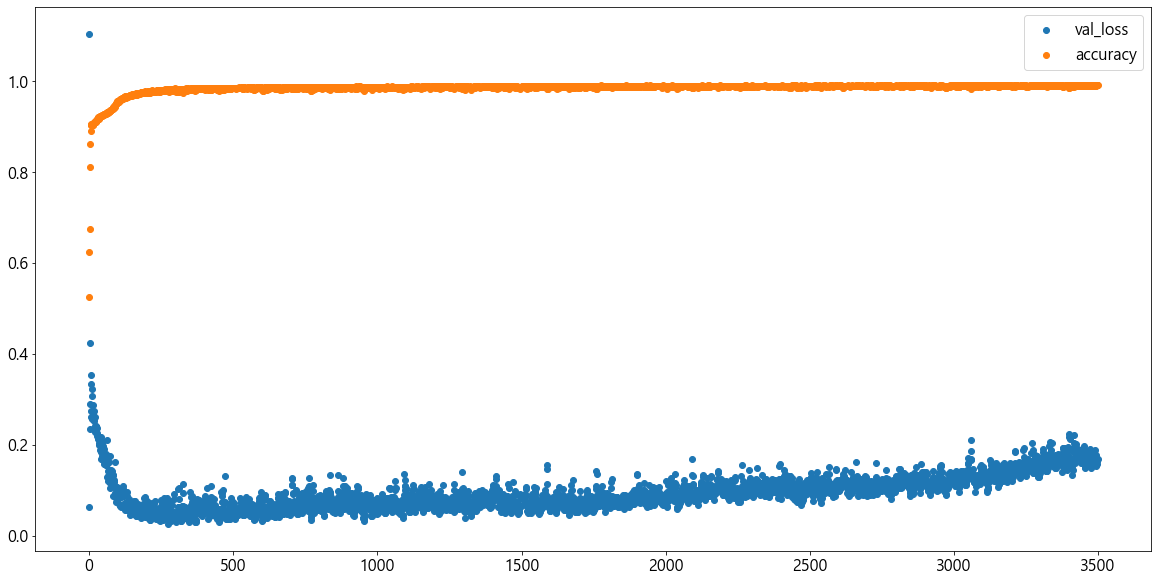

In [11]:
# 오차 정도와 정확도를 그래프로 비교해본다.
x_len = np.arange(3500)

plt.scatter(x_len, history.history['val_loss'], label='val_loss')
plt.scatter(x_len, history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
